# Project Title : Car Price Prediction Project

# Problem Statement:

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model.

# Business Goal:

We need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the best model.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the data-set
df=pd.read_csv("car_price_csv_merged.csv")
df.head(5)

,Unnamed: 0,Unnamed: 0.1,Brand,Model,Variant,Year_of_Manufacturing,Transmission Type,Fuel Type,Kilometers Driven,No of Owners,Price,Location
0,0,0,Maruti Suzuki,Swift Dzire,NaN,2018,Manual,Petrol,"17,400 km",1st,"6,90,000",Chennai
1,1,1,Toyota,Innova,NaN,2013,Manual,Diesel,"200,000 km",1st,"6,80,000",Chennai
2,2,2,Hyundai,i10,NaN,2008,Manual,Petrol,"77,000 km",2nd,"2,60,000",Chennai
3,3,3,Maruti Suzuki,Swift Dzire,NaN,2015,Manual,Diesel,"105,000 km",1st,"5,49,000",Chennai
4,4,4,Maruti Suzuki,SX4,NaN,2007,Manual,Petrol,"98,000 km",2nd,"2,10,000",Chennai


In [3]:
#checking the shape of the data-set
df.shape

(15950, 12)

# Data Cleaning :

In [4]:
#checking the variant column
df['Variant'].value_counts()

Series([], Name: Variant, dtype: int64)

Observations :
    1. 'Variant' column doesnt have any data in it. so we can drop that column.
    2. 'Unnamed: 0', 'Unnamed: 0.1' are 2 unwanted index columns.

In [5]:
#dropping the unwanted columns
df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Variant'], inplace=True, axis = 1)
df.head(5)

,Brand,Model,Year_of_Manufacturing,Transmission Type,Fuel Type,Kilometers Driven,No of Owners,Price,Location
0,Maruti Suzuki,Swift Dzire,2018,Manual,Petrol,"17,400 km",1st,"6,90,000",Chennai
1,Toyota,Innova,2013,Manual,Diesel,"200,000 km",1st,"6,80,000",Chennai
2,Hyundai,i10,2008,Manual,Petrol,"77,000 km",2nd,"2,60,000",Chennai
3,Maruti Suzuki,Swift Dzire,2015,Manual,Diesel,"105,000 km",1st,"5,49,000",Chennai
4,Maruti Suzuki,SX4,2007,Manual,Petrol,"98,000 km",2nd,"2,10,000",Chennai


In [6]:
##changing the dtype and striping the unwanted commas,words from the data

#Kilometers Driven
df['Kilometers Driven'] = df['Kilometers Driven'].str.replace('km','')
df['Kilometers Driven'] = df['Kilometers Driven'].str.replace(',','')
df['Kilometers Driven'] = df['Kilometers Driven'].str.replace('-','0')

#converting into int
df['Kilometers Driven'] = df['Kilometers Driven'].astype(int)

In [7]:
#finding mean for kms driven
kmsmean = df['Kilometers Driven'].mean()
kmsmean

65577.26846394985

In [8]:
#Replacing 0 with mean value in kms driven
df['Kilometers Driven'] = df['Kilometers Driven'].apply(lambda x: x if x!=0 else kmsmean)

In [9]:
#Price
df['Price'] = df['Price'].str.strip()
df['Price'] = df['Price'].str.replace(',','')
df['Price'] = df['Price'].str.replace('-','0')

#converting into float
df['Price'] = df['Price'].astype(float)

In [10]:
#finding mean for kms driven
pricemean = df['Price'].mean()
pricemean

641895.2333542319

In [11]:
#Replacing 0 with mean value in kms driven
df['Price'] = df['Price'].apply(lambda x: x if x!=0 else pricemean)

In [12]:
#Year_of_Manufacturing
df['Year_of_Manufacturing'] = df['Year_of_Manufacturing'].apply(lambda x: int(x.strip()[0:4]) if x!='-' else 0)

# median year
median_year=df['Year_of_Manufacturing'].median()

#Replacing 0 with median value
df['Year_of_Manufacturing'] = df['Year_of_Manufacturing'].apply(lambda x: x if x!=0 else median_year)

#converting into int
df['Year_of_Manufacturing'] = df['Year_of_Manufacturing'].astype(int)

In [13]:
#No of Owners
df['No of Owners'] = df['No of Owners'].str.replace('1st','1').replace('2nd','2').replace('3rd','3').replace('4th','4').replace('-','4+')

In [14]:
df['No of Owners'].value_counts()

1     9310
2     4102
4+    1258
3     1057
4      223
Name: No of Owners, dtype: int64

In [15]:
# Fuel Type

df['Fuel Type'].value_counts()

Diesel           7217
Petrol           7150
-                 856
CNG & Hybrids     593
LPG               127
Electric            7
Name: Fuel Type, dtype: int64

In [16]:
# mode for fuel
Fuel_mode = df['Fuel Type'].mode()
Fuel_mode

0    Diesel
dtype: object

In [17]:
# Fuel type 
df['Fuel Type'] = df['Fuel Type'].apply(lambda x: x if x!='-' else 0)

#Replacing 0 with mode value
df['Fuel Type'] = df['Fuel Type'].apply(lambda x: x if x!=0 else "Diesel")

df['Fuel Type'].value_counts()

Diesel           8073
Petrol           7150
CNG & Hybrids     593
LPG               127
Electric            7
Name: Fuel Type, dtype: int64

In [18]:
# Transmission Type
df['Transmission Type'].value_counts()

Manual       11849
Automatic     2959
-             1142
Name: Transmission Type, dtype: int64

In [19]:
#replacing the "-" with manual
df['Transmission Type'] = df['Transmission Type'].apply(lambda x: x if x!='-' else 'Manual')

df['Transmission Type'].value_counts()

Manual       12991
Automatic     2959
Name: Transmission Type, dtype: int64

In [20]:
# Brand
df['Brand'].value_counts()

Maruti Suzuki       4836
Hyundai             2565
Toyota              1263
Mahindra            1137
Honda                922
-                    689
Tata                 685
Ford                 658
Volkswagen           540
Audi                 364
Mercedes-Benz        347
Renault              317
Chevrolet            276
Skoda                248
BMW                  199
Nissan               183
Datsun                87
Jeep                  80
Land Rover            75
Kia                   63
Jaguar                56
Other Brands          52
Fiat                  41
Bajaj                 35
Volvo                 29
Ambassador            26
Mini                  24
Ashok Leyland         23
MG                    23
Mitsubishi            21
Force Motors          20
Porsche               19
Opel                  18
Isuzu                 16
Mahindra Renault       8
Premier                5
Name: Brand, dtype: int64

In [21]:
#replacing the "-" with others
df['Brand'] = df['Brand'].apply(lambda x: x if x!='-' else 'others')
df['Brand'].value_counts()

Maruti Suzuki       4836
Hyundai             2565
Toyota              1263
Mahindra            1137
Honda                922
others               689
Tata                 685
Ford                 658
Volkswagen           540
Audi                 364
Mercedes-Benz        347
Renault              317
Chevrolet            276
Skoda                248
BMW                  199
Nissan               183
Datsun                87
Jeep                  80
Land Rover            75
Kia                   63
Jaguar                56
Other Brands          52
Fiat                  41
Bajaj                 35
Volvo                 29
Ambassador            26
Mini                  24
MG                    23
Ashok Leyland         23
Mitsubishi            21
Force Motors          20
Porsche               19
Opel                  18
Isuzu                 16
Mahindra Renault       8
Premier                5
Name: Brand, dtype: int64

In [22]:
# Model
df['Model'].value_counts()

Swift           852
-               689
Swift Dzire     530
Innova          448
Wagon R         401
               ... 
Land Cruiser      2
Marshal           2
Punto             2
Gypsy             2
XL6               2
Name: Model, Length: 252, dtype: int64

In [23]:
#replacing the "-" with others in Model
df['Model'] = df['Model'].apply(lambda x: x if x!='-' else 'others')
df['Model'].value_counts()

Swift           852
others          689
Swift Dzire     530
Innova          448
Wagon R         401
               ... 
Land Cruiser      2
Punto             2
Marshal           2
Gypsy             2
XL6               2
Name: Model, Length: 252, dtype: int64

In [24]:
# Location
df['Location'].value_counts()

Delhi        3864
Mumbai       3202
Chennai      3185
karnataka    3102
kerala       2597
Name: Location, dtype: int64

In [25]:
df.dtypes

Brand                     object
Model                     object
Year_of_Manufacturing      int32
Transmission Type         object
Fuel Type                 object
Kilometers Driven        float64
No of Owners              object
Price                    float64
Location                  object
dtype: object

In [26]:
df.head(10)

,Brand,Model,Year_of_Manufacturing,Transmission Type,Fuel Type,Kilometers Driven,No of Owners,Price,Location
0,Maruti Suzuki,Swift Dzire,2018,Manual,Petrol,17400.0,1,690000.0,Chennai
1,Toyota,Innova,2013,Manual,Diesel,200000.0,1,680000.0,Chennai
2,Hyundai,i10,2008,Manual,Petrol,77000.0,2,260000.0,Chennai
3,Maruti Suzuki,Swift Dzire,2015,Manual,Diesel,105000.0,1,549000.0,Chennai
4,Maruti Suzuki,SX4,2007,Manual,Petrol,98000.0,2,210000.0,Chennai
5,Mahindra,Xylo,2012,Manual,Diesel,150000.0,3,540000.0,Chennai
6,Hyundai,Santro Xing,2010,Manual,Petrol,70000.0,1,180000.0,Chennai
7,Maruti Suzuki,Eeco,2011,Manual,Petrol,82000.0,1,230000.0,Chennai
8,Maruti Suzuki,Alto K10,2017,Manual,Petrol,19000.0,1,360000.0,Chennai
9,Maruti Suzuki,Swift Dzire Tour,2018,Manual,Diesel,67000.0,1,575000.0,Chennai


In [27]:
#checking all the column names
list(df.columns)

['Brand',
 'Model',
 'Year_of_Manufacturing',
 'Transmission Type',
 'Fuel Type',
 'Kilometers Driven',
 'No of Owners',
 'Price',
 'Location']

In [28]:
df = df[['Brand', 'Model', 'Year_of_Manufacturing', 'Transmission Type', 'Fuel Type', 'Kilometers Driven', 'No of Owners', 'Location', 'Price']]
df.sample(5)

,Brand,Model,Year_of_Manufacturing,Transmission Type,Fuel Type,Kilometers Driven,No of Owners,Location,Price
4762,Hyundai,Grand i10,2018,Manual,CNG & Hybrids,45000.0,1,Delhi,525000.0
10647,Mahindra Renault,Logan,2009,Manual,Diesel,95000.0,2,kerala,109000.0
15601,Chevrolet,Enjoy,2014,Manual,Diesel,70123.0,1,Mumbai,325000.0
3354,Maruti Suzuki,Ciaz,2016,Manual,Petrol,45000.0,1,Delhi,665000.0
15226,Honda,Amaze,2016,Manual,Petrol,61906.0,1,Mumbai,445000.0


In [29]:
(df['Brand'] == 'others').sum()

689

In [30]:
df.shape

(15950, 9)

In [31]:
#df.drop(df[df['Age'] < 25].index, inplace = True)

In [32]:
drop689 = df[df['Brand'] == 'others'].index
df.drop(drop689, inplace = True)

In [33]:
df.shape

(15261, 9)

In [35]:
(df['Brand'] == 'others').sum()

0

In [36]:
#checking the data type and null values of the variables in the data-set
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15261 entries, 0 to 15938
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  15261 non-null  object 
 1   Model                  15261 non-null  object 
 2   Year_of_Manufacturing  15261 non-null  int32  
 3   Transmission Type      15261 non-null  object 
 4   Fuel Type              15261 non-null  object 
 5   Kilometers Driven      15261 non-null  float64
 6   No of Owners           15261 non-null  object 
 7   Location               15261 non-null  object 
 8   Price                  15261 non-null  float64
dtypes: float64(2), int32(1), object(6)
memory usage: 1.1+ MB


In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Manufacturing,15261.0,2013.142848,4.542378,1980.0,2011.0,2014.0,2017.0,2021.0
Kilometers Driven,15261.0,68890.293429,54723.587433,1.0,40123.0,64000.0,85000.0,970000.0
Price,15261.0,670875.366752,886589.207986,15000.0,260000.0,450000.0,722222.0,16500000.0


In [38]:
# Describing object types
df.describe(include='object').T

,count,unique,top,freq
Brand,15261,35,Maruti Suzuki,4836
Model,15261,251,Swift,852
Transmission Type,15261,2,Manual,12302
Fuel Type,15261,5,Diesel,7384
No of Owners,15261,5,1,9310
Location,15261,5,Delhi,3690


# Handling the Null Values :

In [39]:
#checking the null values 
for col in df.columns:print("\nTitle :",col,"\nNaN val:",df[col].isnull().sum())


Title : Brand 
NaN val: 0

Title : Model 
NaN val: 0

Title : Year_of_Manufacturing 
NaN val: 0

Title : Transmission Type 
NaN val: 0

Title : Fuel Type 
NaN val: 0

Title : Kilometers Driven 
NaN val: 0

Title : No of Owners 
NaN val: 0

Title : Location 
NaN val: 0

Title : Price 
NaN val: 0


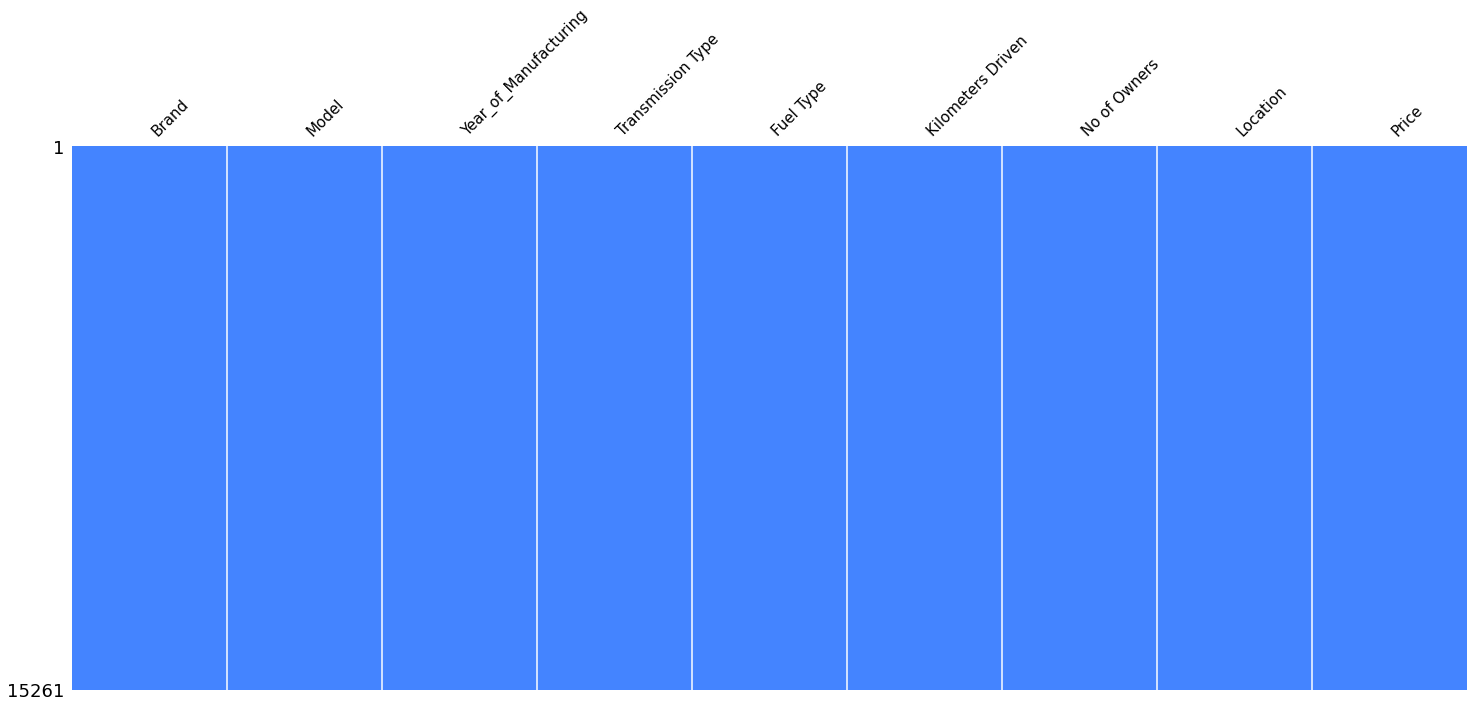

In [41]:
# Program to visualize missing values in dataset
# Importing the libraries
import missingno as msno
# Visualize missing values as a matrix
msno.matrix(df,labels=True, sparkline=False, figsize=(25,10), fontsize=15, color=(0.27, 0.52, 1.0))

# Correlation with target variable

Text(0.5, 1.0, 'Correlation with target variable')

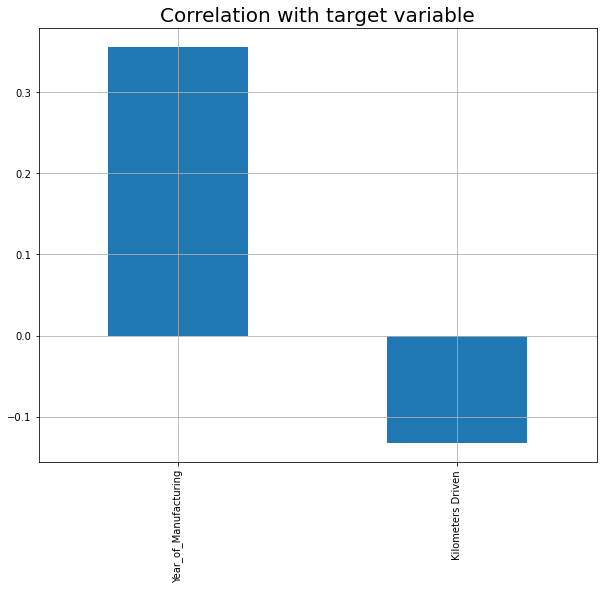

In [46]:
plt.figure(figsize=(10,8))
df.drop( 'Price', axis=1 ).corrwith( df['Price'] ).plot( kind='bar', grid=True )
plt.xticks(rotation=90)
plt.title("Correlation with target variable",fontsize=20)

# Catagorical Variables :

In [47]:
cat_List = [x for x in df.columns if df[x].dtype==object]
list (cat_List)

['Brand',
 'Model',
 'Transmission Type',
 'Fuel Type',
 'No of Owners',
 'Location']

# Continous Variables :

In [48]:
num_List = [x for x in df.columns if x not in cat_List]
list (num_List)

['Year_of_Manufacturing', 'Kilometers Driven', 'Price']

# DATA VISUALIZATION :

UNI-VARIATE ANALYSIS :

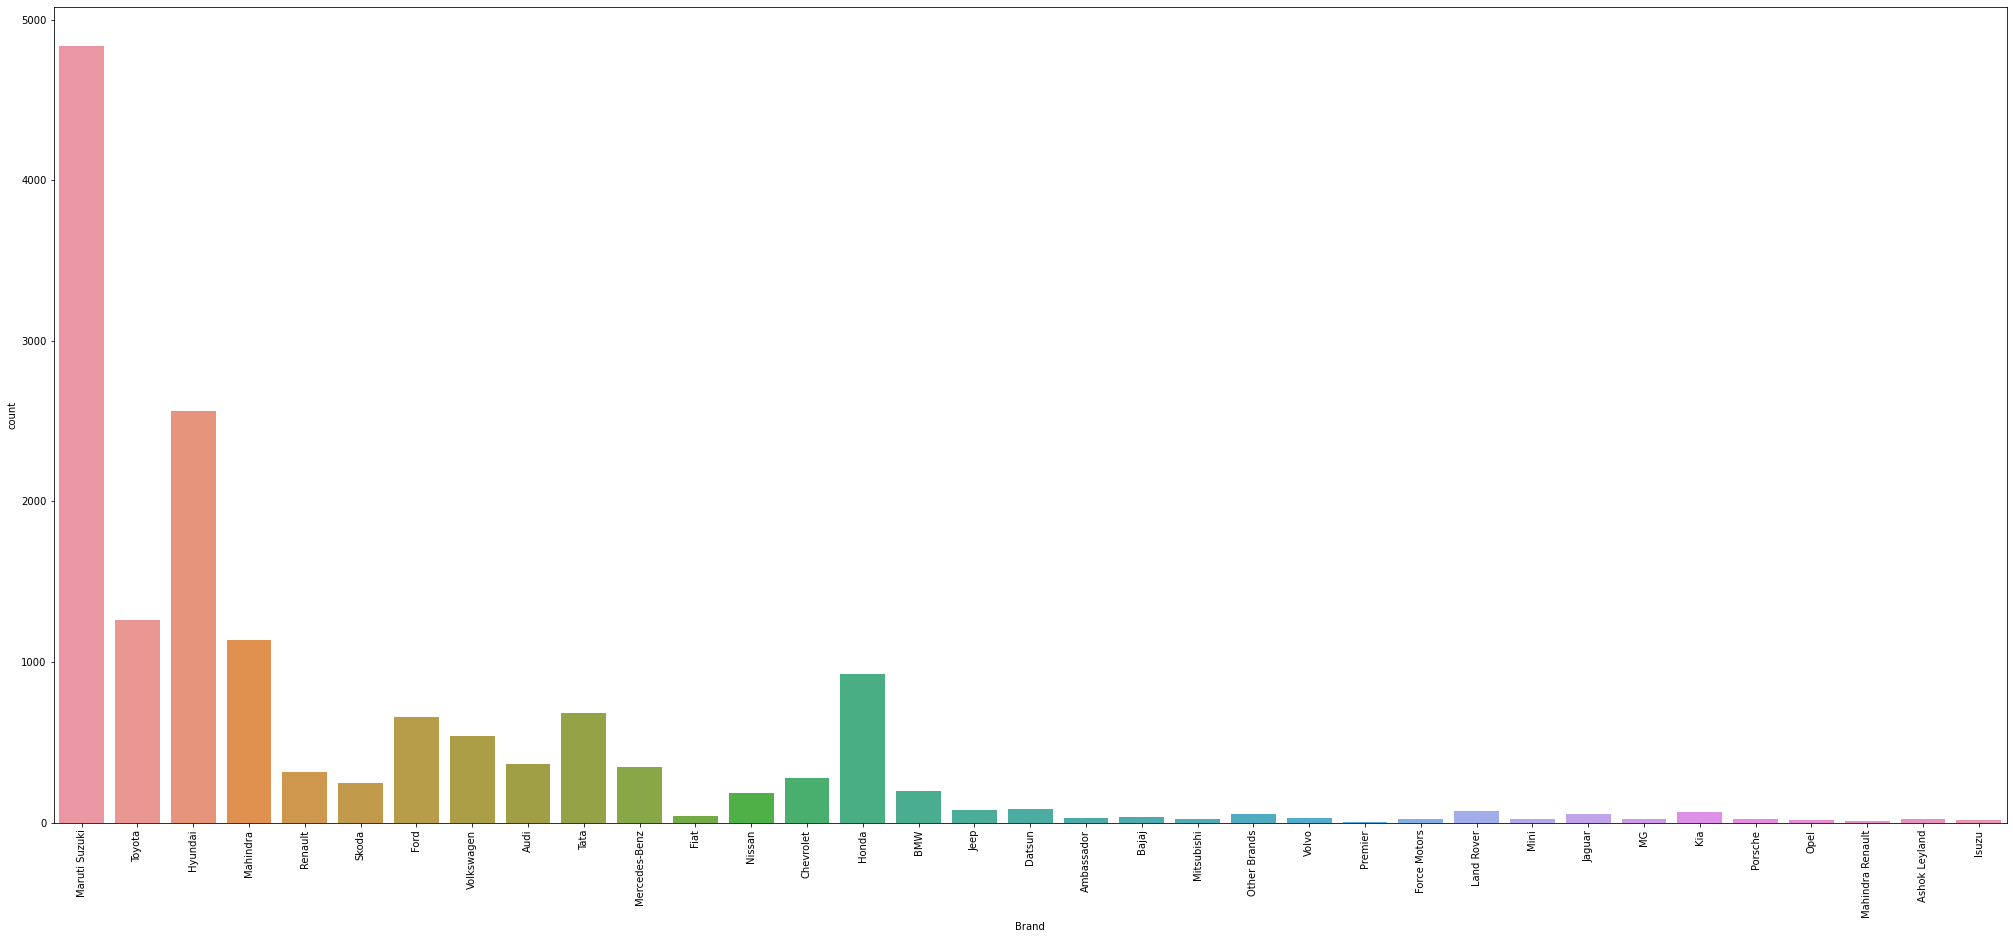

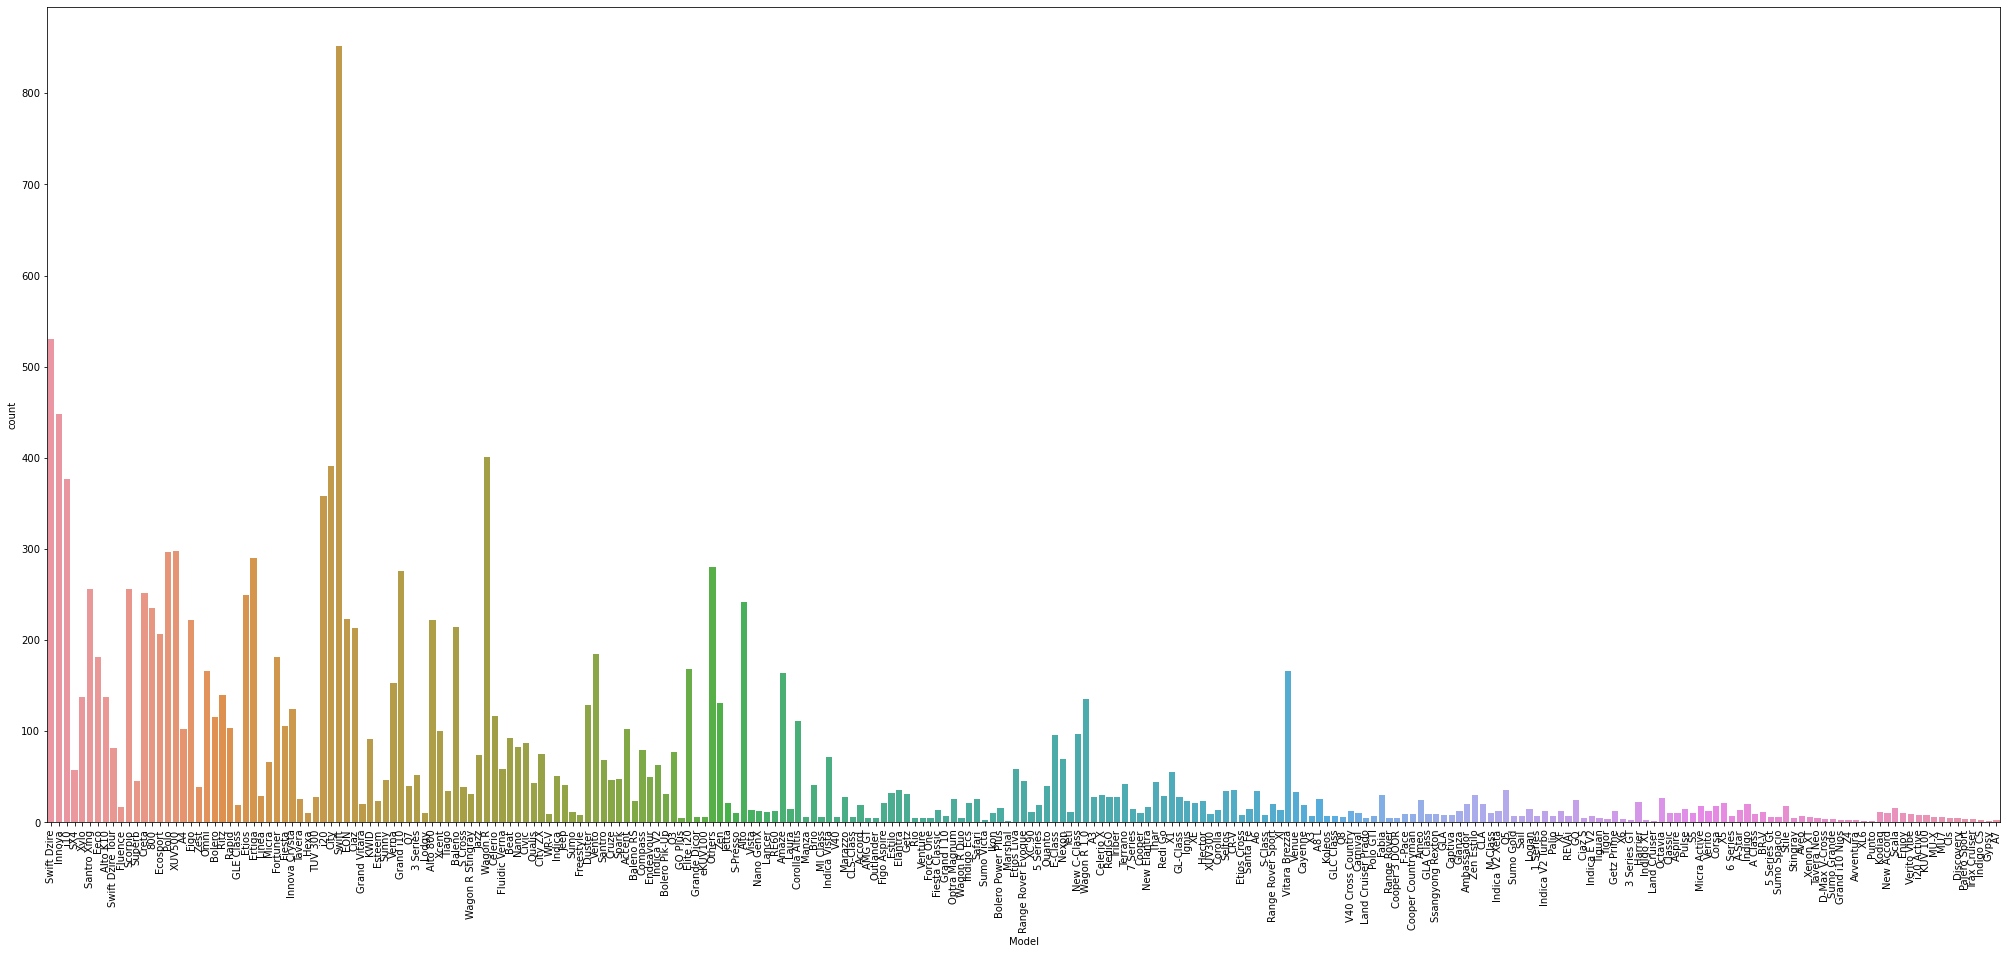

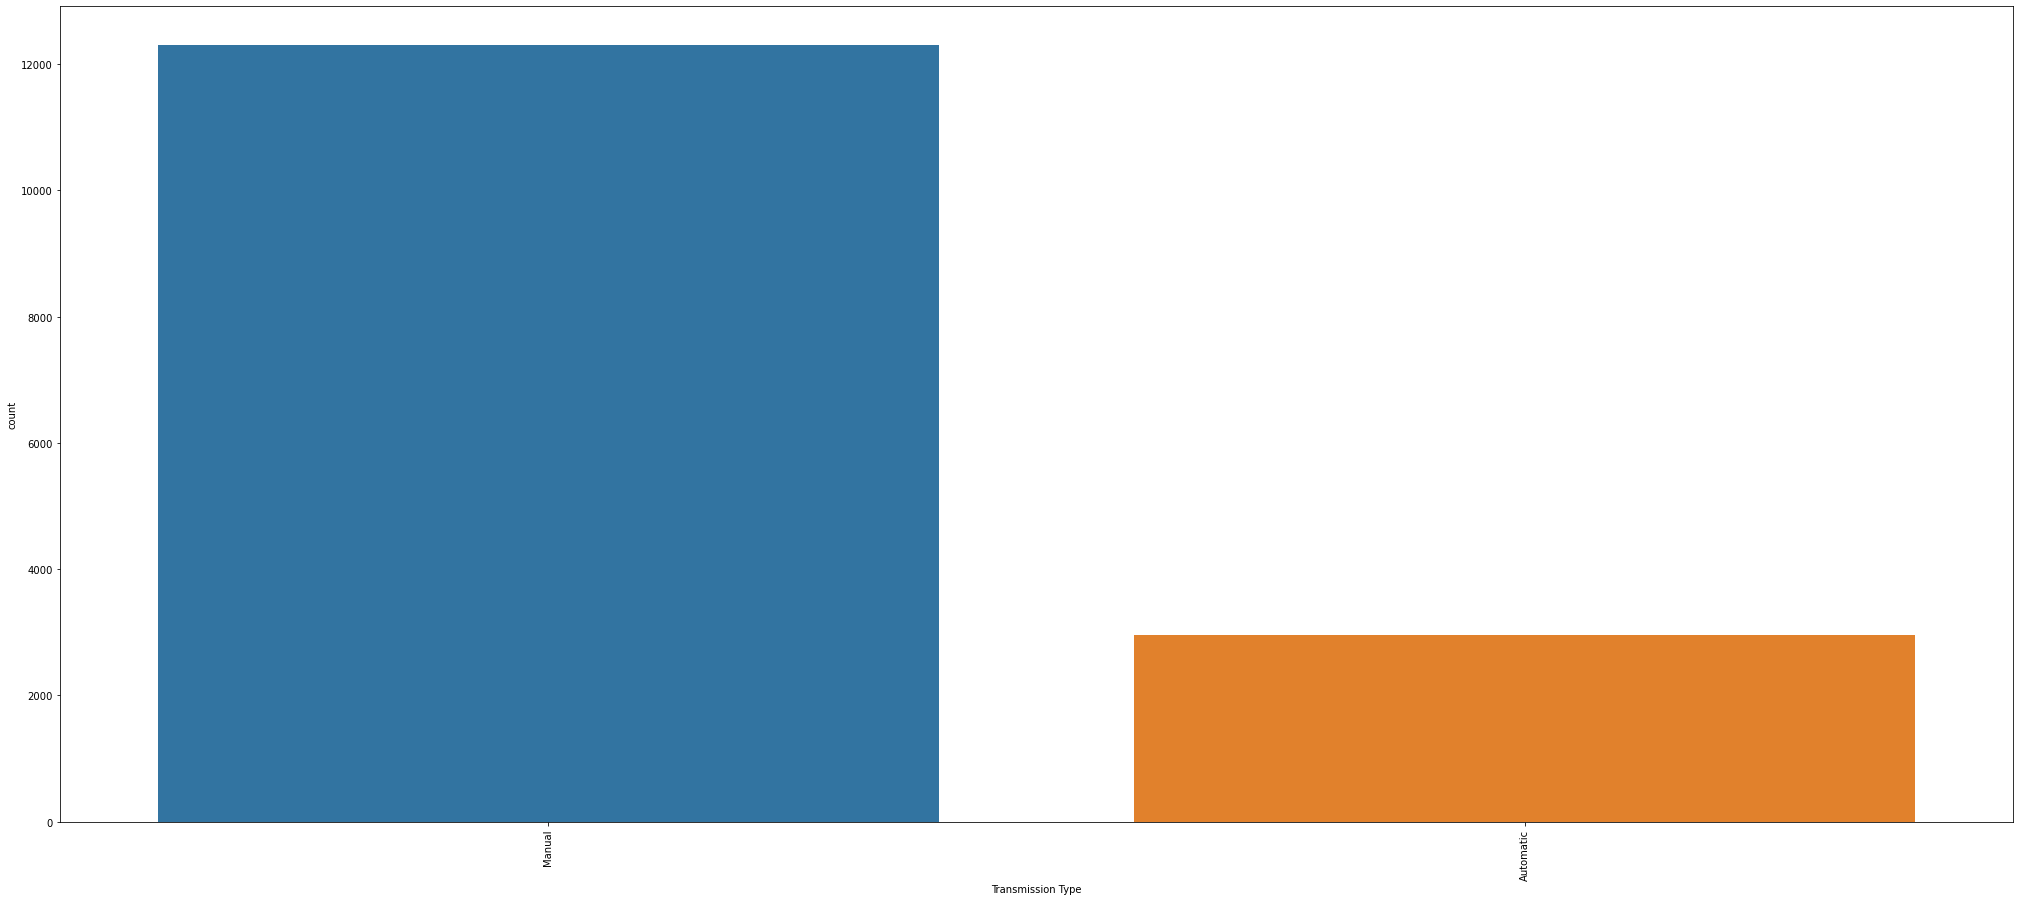

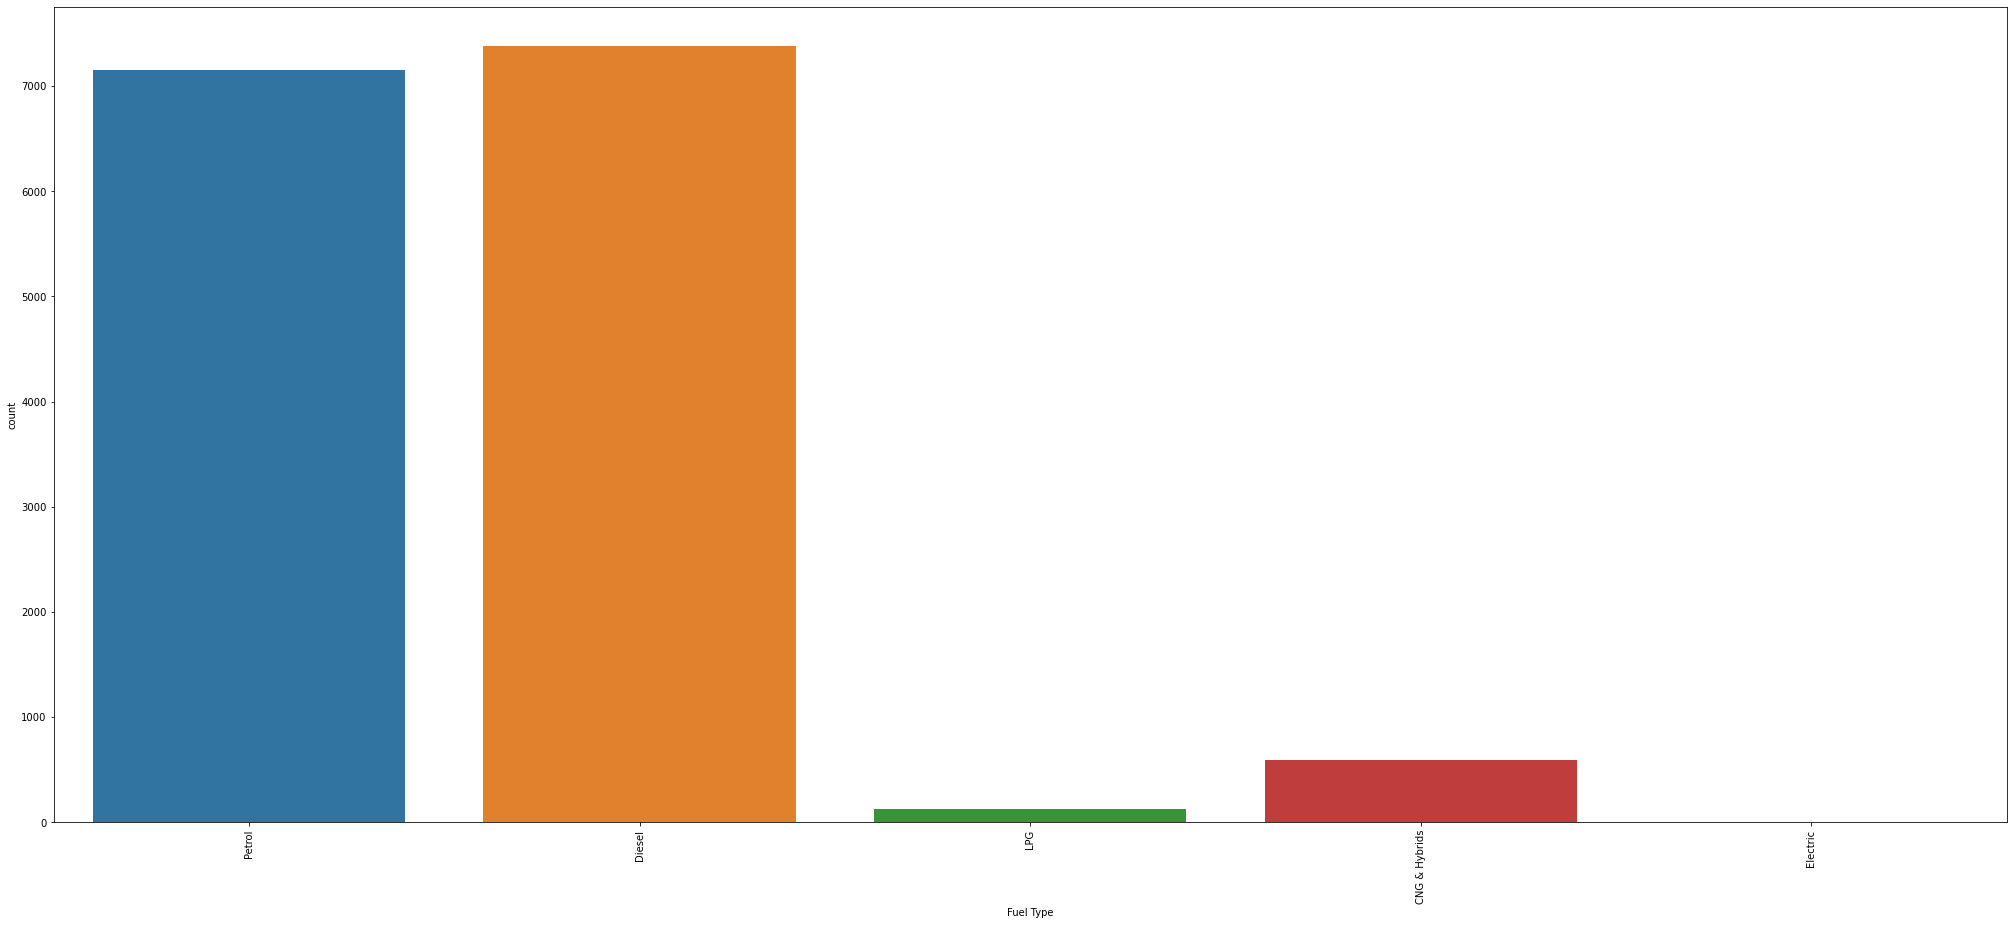

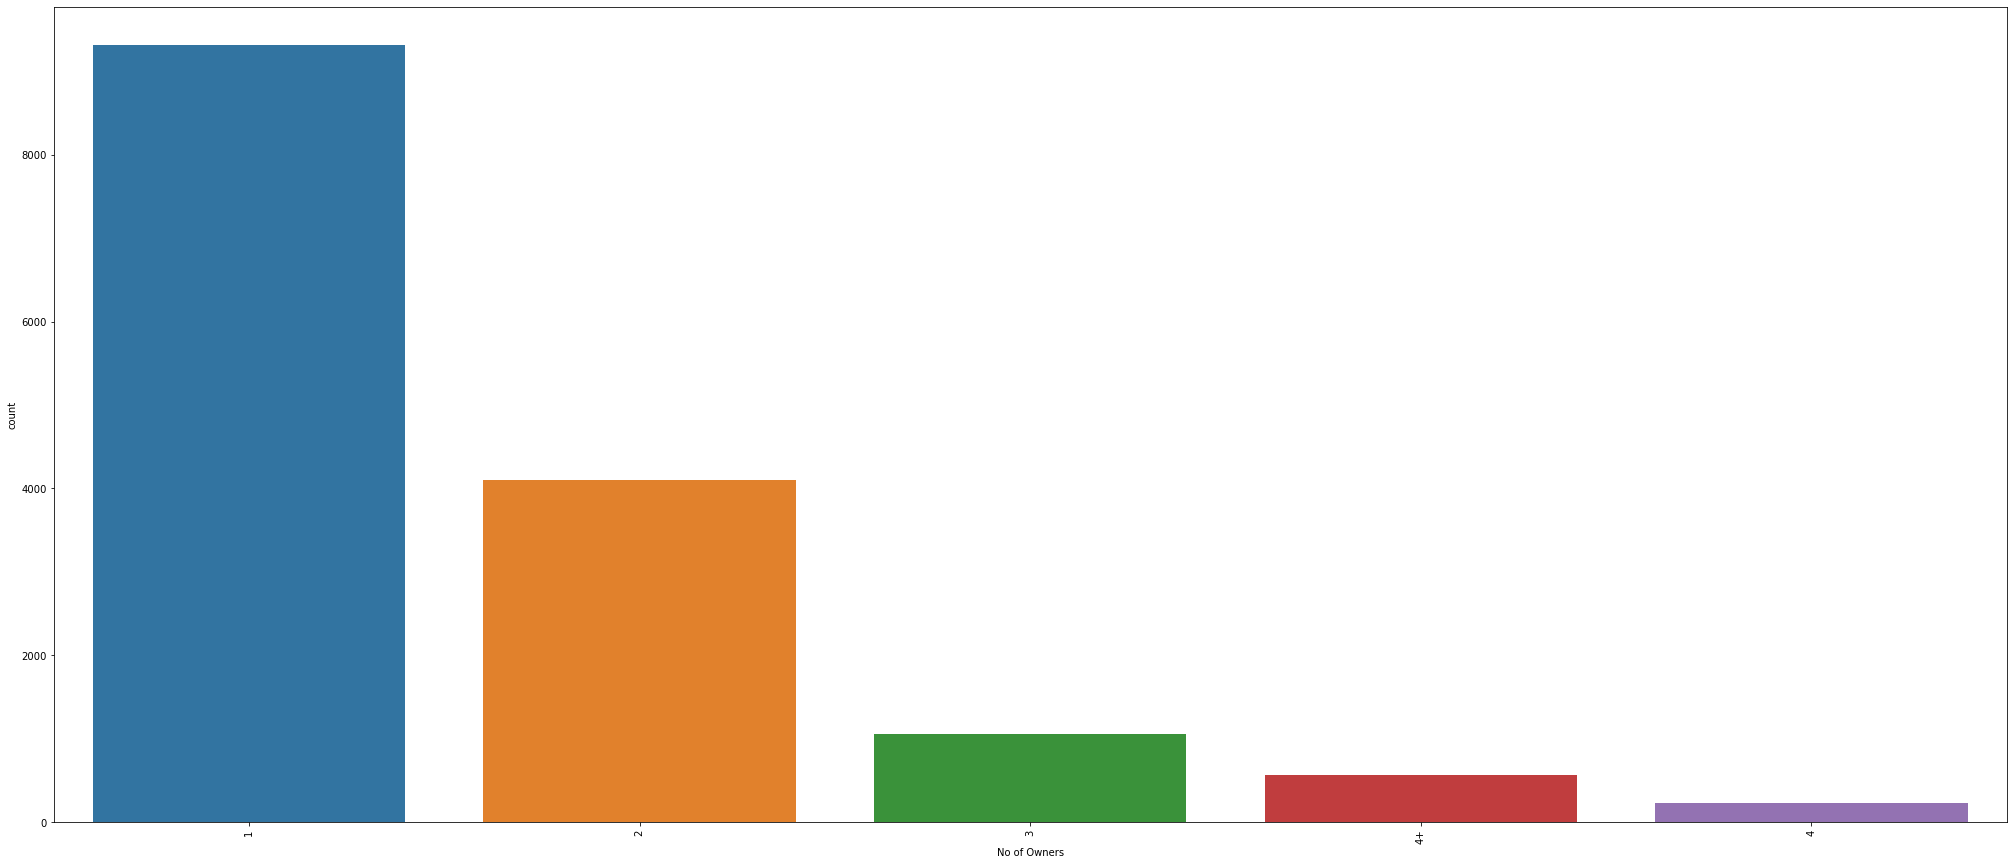

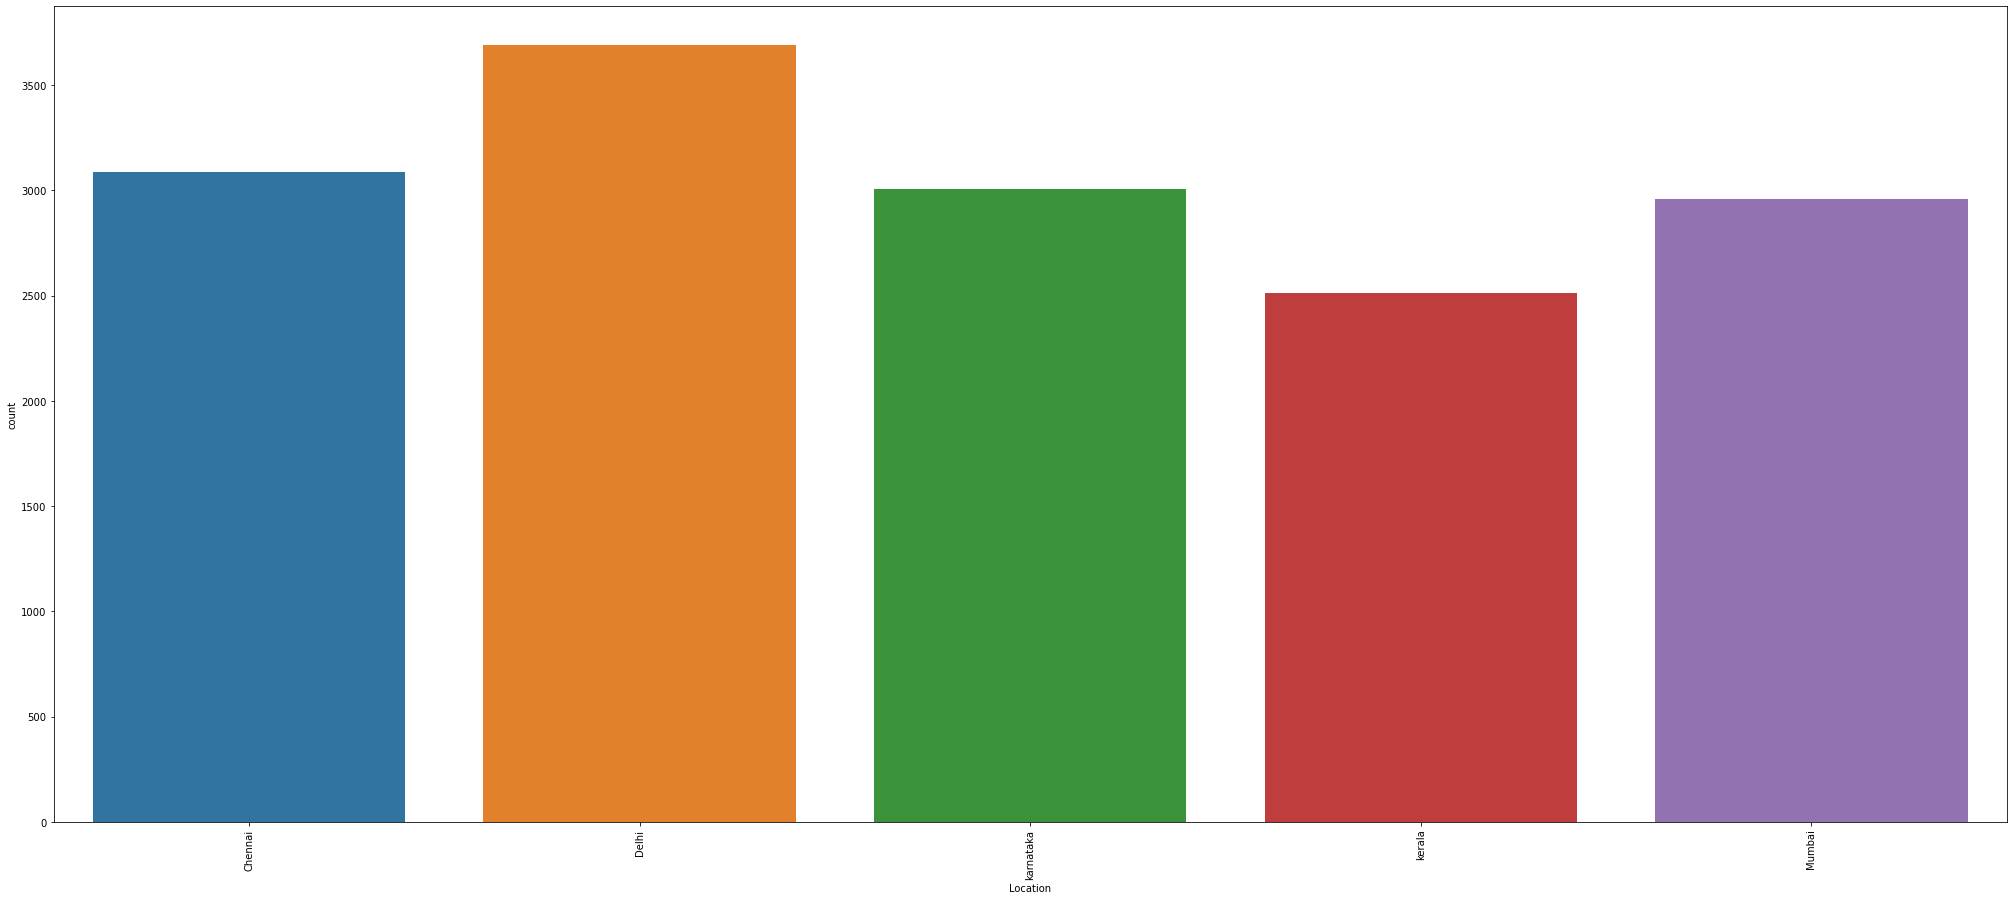

In [56]:
for i in cat_List:
    plt.figure(figsize=(35,15))
    sn.countplot(df[i])
    plt.xticks(rotation=90)
    plt.show()

# BI-VARIATE ANALYSIS :

<Figure size 2160x1800 with 0 Axes>

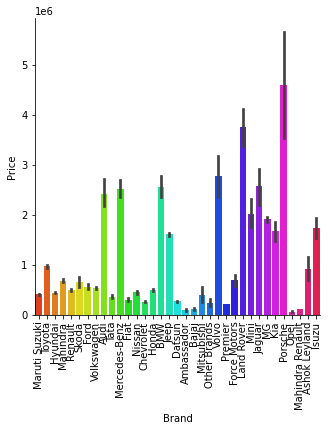

<Figure size 2160x1800 with 0 Axes>

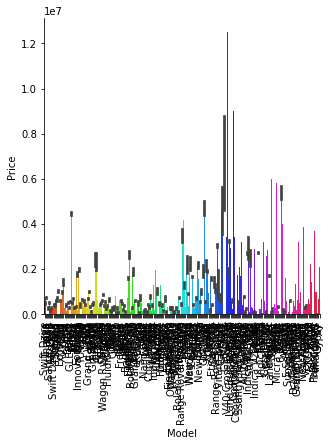

<Figure size 2160x1800 with 0 Axes>

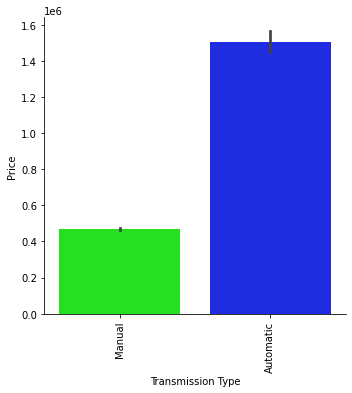

<Figure size 2160x1800 with 0 Axes>

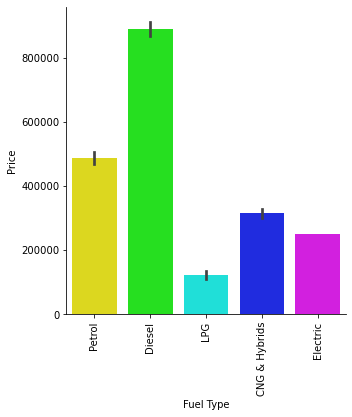

<Figure size 2160x1800 with 0 Axes>

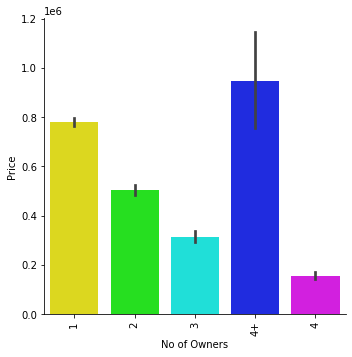

<Figure size 2160x1800 with 0 Axes>

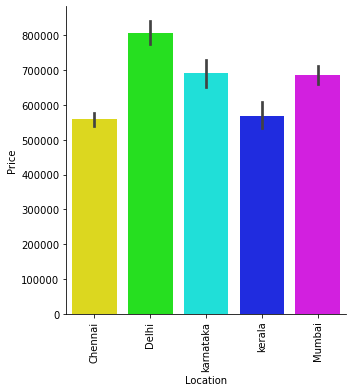

In [60]:
for i in cat_List:
    plt.figure(figsize=(30,25))
    sn.catplot(y='Price',x=i,data=df,kind="bar",palette="hsv")
    plt.xticks(rotation=90)
    plt.show()

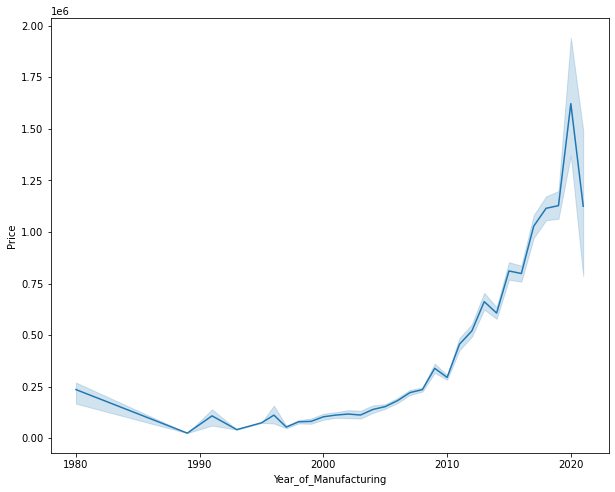

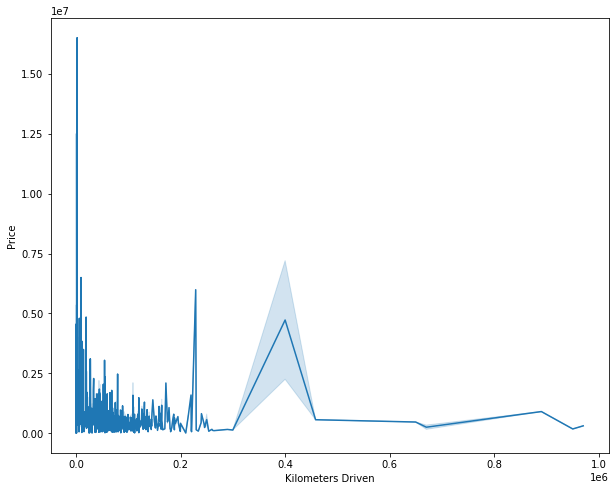

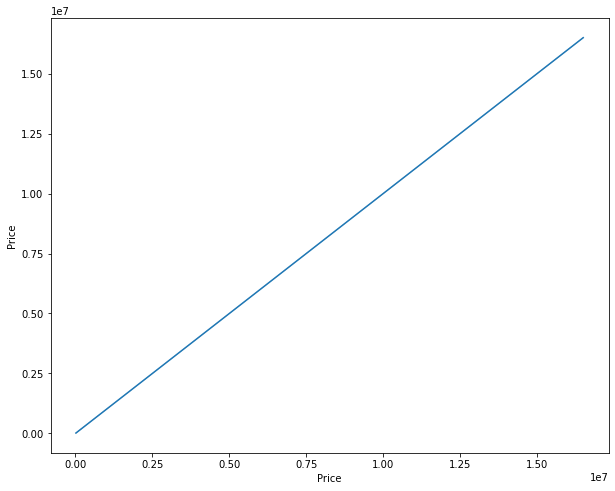

In [62]:
for i in num_List:
    plt.figure(figsize=(10,8))
    sn.lineplot(y='Price',x=i,data=df)
    plt.show()

In [63]:
df.head(0)

,Brand,Model,Year_of_Manufacturing,Transmission Type,Fuel Type,Kilometers Driven,No of Owners,Location,Price


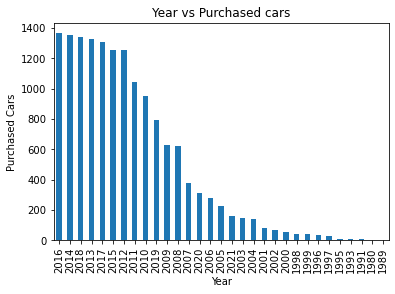

In [67]:
#Plotting year vs no of cars
purchased_car_per_year = df['Year_of_Manufacturing'].value_counts()
purchased_car_per_year.plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Purchased Cars")
plt.title("Year vs Purchased cars")
plt.show()

# Feature Engineering:

# Now we will use Label Encoder to change catagorical values to Numerical values.
# LabelEncoder


In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_List:
    df[i] = le.fit_transform(df[i].astype(str))
print (df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15261 entries, 0 to 15938
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  15261 non-null  int32  
 1   Model                  15261 non-null  int32  
 2   Year_of_Manufacturing  15261 non-null  int32  
 3   Transmission Type      15261 non-null  int32  
 4   Fuel Type              15261 non-null  int32  
 5   Kilometers Driven      15261 non-null  float64
 6   No of Owners           15261 non-null  int32  
 7   Location               15261 non-null  int32  
 8   Price                  15261 non-null  float64
dtypes: float64(2), int32(7)
memory usage: 1.4 MB
None


In [70]:
#Checking the dataset
df.head()

,Brand,Model,Year_of_Manufacturing,Transmission Type,Fuel Type,Kilometers Driven,No of Owners,Location,Price
0,20,201,2018,1,4,17400.0,0,0,690000.0
1,32,118,2013,1,1,200000.0,0,0,680000.0
2,11,248,2008,1,4,77000.0,1,0,260000.0
3,20,201,2015,1,1,105000.0,0,0,549000.0
4,20,180,2007,1,4,98000.0,1,0,210000.0


In [74]:
#Statistical summary of the dataset
df.describe() 

,Brand,Model,Year_of_Manufacturing,Transmission Type,Fuel Type,Kilometers Driven,No of Owners,Location,Price
count,15261.000000,15261.000000,15261.000000,15261.000000,15261.000000,15261.000000,15261.000000,15261.000000,1.526100e+04
mean,18.435424,129.137933,2013.142848,0.806107,2.383789,68890.293429,0.600288,1.879693,6.708754e+05
std,8.365009,76.940928,4.542378,0.395359,1.540947,54723.587433,0.955832,1.375909,8.865892e+05
min,0.000000,0.000000,1980.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.500000e+04
25%,11.000000,62.000000,2011.000000,1.000000,1.000000,40123.000000,0.000000,1.000000,2.600000e+05
50%,20.000000,124.000000,2014.000000,1.000000,1.000000,64000.000000,0.000000,2.000000,4.500000e+05
75%,20.000000,200.000000,2017.000000,1.000000,4.000000,85000.000000,1.000000,3.000000,7.222220e+05
max,34.000000,250.000000,2021.000000,1.000000,4.000000,970000.000000,4.000000,4.000000,1.650000e+07


In [75]:
#Checking correlation of the dataset
corr=df.corr()  #corr() function provides the correlation value of each column
corr

,Brand,Model,Year_of_Manufacturing,Transmission Type,Fuel Type,Kilometers Driven,No of Owners,Location,Price
Brand,1.000000,0.093857,0.022042,0.096803,-0.103890,0.105912,-0.027054,0.022794,-0.067410
Model,0.093857,1.000000,-0.023385,0.096246,-0.063901,0.033045,-0.004554,-0.011801,-0.058917
Year_of_Manufacturing,0.022042,-0.023385,1.000000,-0.188992,-0.123867,-0.335421,-0.361461,-0.125976,0.355400
Transmission Type,0.096803,0.096246,-0.188992,1.000000,0.012115,0.114207,0.072182,0.051440,-0.462308
Fuel Type,-0.103890,-0.063901,-0.123867,0.012115,1.000000,-0.203454,0.052104,0.080874,-0.187129
Kilometers Driven,0.105912,0.033045,-0.335421,0.114207,-0.203454,1.000000,0.107317,0.018897,-0.132050
No of Owners,-0.027054,-0.004554,-0.361461,0.072182,0.052104,0.107317,1.000000,0.188805,-0.089249
Location,0.022794,-0.011801,-0.125976,0.051440,0.080874,0.018897,0.188805,1.000000,-0.014104
Price,-0.067410,-0.058917,0.355400,-0.462308,-0.187129,-0.132050,-0.089249,-0.014104,1.000000


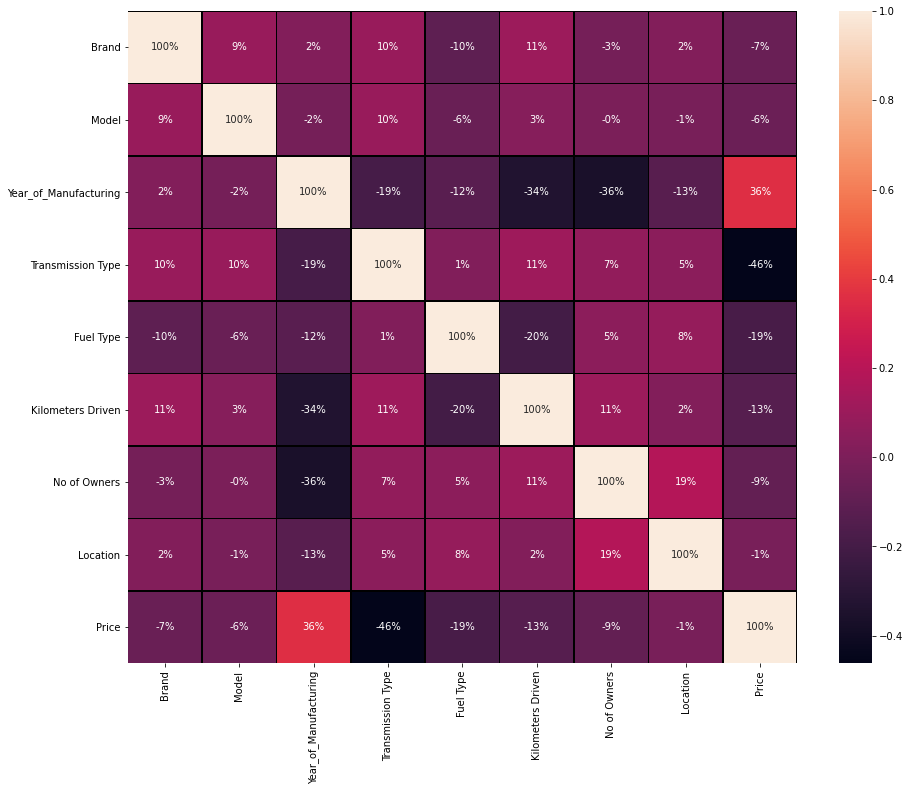

In [78]:
#Plotting heatmap for visualizing the correlation
plt.figure(figsize=(15,12))
sn.heatmap(corr,linewidth=0.5,linecolor='black',fmt='.0%',annot=True)
plt.show()

Text(0.5, 1.0, 'Correlation with Target variable')

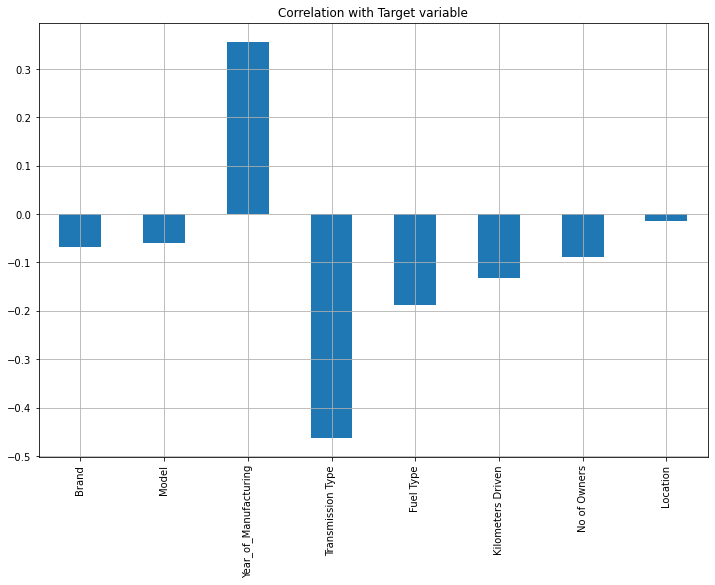

In [79]:
#Correlation with target variable
plt.figure(figsize=(12,8))
df.drop('Price',axis=1).corrwith(df['Price']).plot(kind='bar',grid=True)
plt.title('Correlation with Target variable')

# Checking skewness :

In [80]:
#checking the skewness
df.skew()

Brand                    0.146203
Model                    0.012543
Year_of_Manufacturing   -1.025200
Transmission Type       -1.548705
Fuel Type                0.046864
Kilometers Driven        6.569194
No of Owners             1.995361
Location                 0.129712
Price                    6.262688
dtype: float64

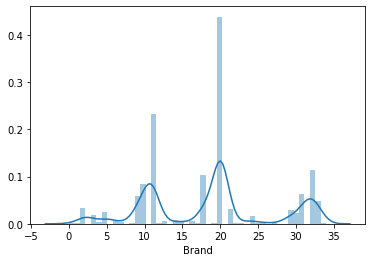

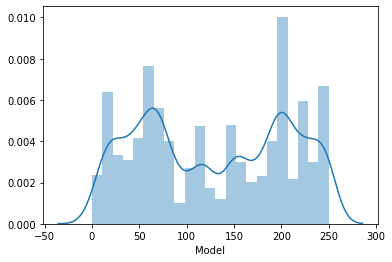

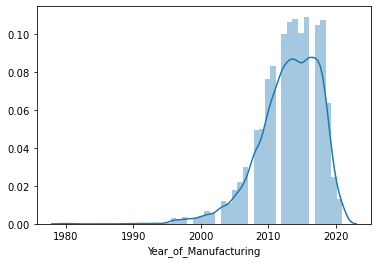

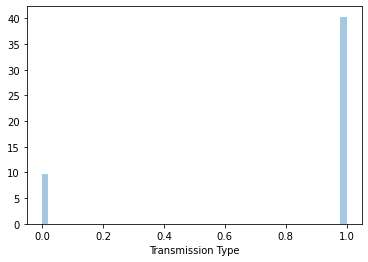

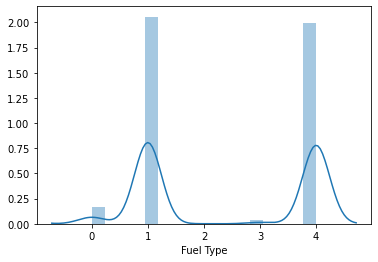

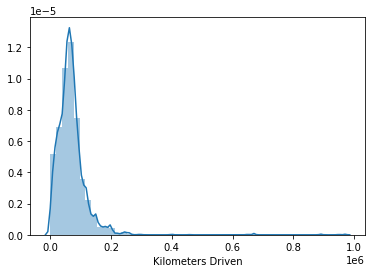

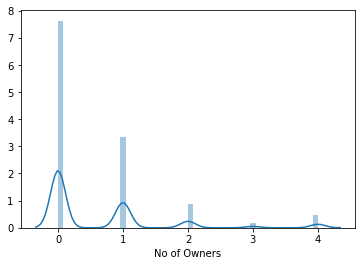

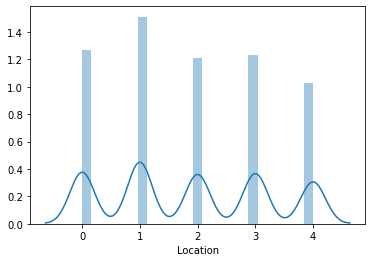

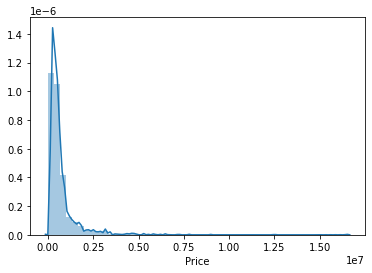

In [81]:
#Plotting distplot for checking the distribution of skewness
for col in df.describe().columns:
    sn.distplot(df[col])
    plt.show()

# Checking outliers :

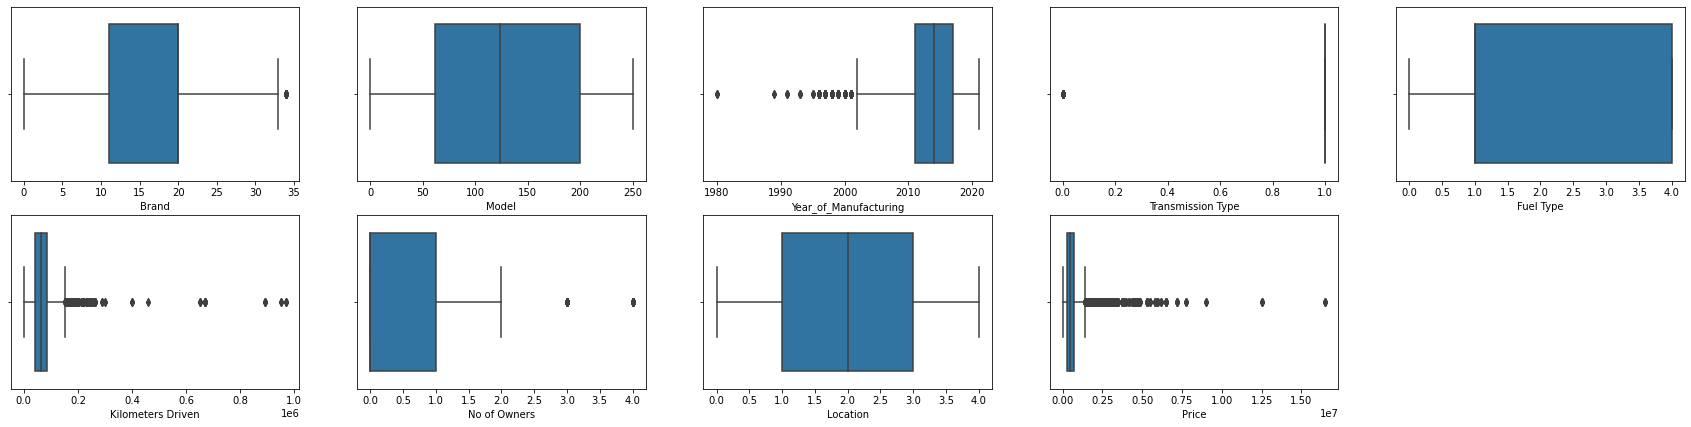

In [90]:
collist=df.columns.values
ncol=5
nrow=8
plt.figure(figsize=(30,30))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sn.boxplot(df[collist[i]])

# Handling outliers by using z-score method :

In [91]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))   #converting all values into absolute values
threshold=3    #setting up a threshold
np.where(z>3)

(array([   32,    71,   112, ..., 15223, 15226, 15249], dtype=int64),
 array([8, 8, 8, ..., 6, 6, 6], dtype=int64))

In [92]:
#Removing outliers
df_new=df[(z<3).all(axis=1)]
df_new

,Brand,Model,Year_of_Manufacturing,Transmission Type,Fuel Type,Kilometers Driven,No of Owners,Location,Price
0,20,201,2018,1,4,17400.0,0,0,690000.0
1,32,118,2013,1,1,200000.0,0,0,680000.0
2,11,248,2008,1,4,77000.0,1,0,260000.0
3,20,201,2015,1,1,105000.0,0,0,549000.0
4,20,180,2007,1,4,98000.0,1,0,210000.0
...,...,...,...,...,...,...,...,...,...
15934,7,131,2013,1,4,28000.0,0,2,375000.0
15935,11,248,2009,1,4,30214.0,0,2,188000.0
15936,26,152,2012,0,1,100000.0,0,2,150000.0
15937,9,78,2010,1,1,132000.0,2,2,231000.0


In [94]:
#Original data dimensions
df.shape   

(15261, 9)

In [95]:
#New data dimensions
df_new.shape

(14188, 9)

# Percentage loss of data after removing outliers :

In [97]:
dfshape = 15261
dfnewshape = 14188
total = dfshape-dfnewshape
percentage_loss=((total)/dfshape)*100   
print(percentage_loss)

7.030994037088003


# Preparing dataset for model training :

In [98]:
df_x=df_new.drop('Price',axis=1) #Independent variables
y=df_new['Price'] #Target Variable

In [99]:
#Checking x data
df_x.head()

,Brand,Model,Year_of_Manufacturing,Transmission Type,Fuel Type,Kilometers Driven,No of Owners,Location
0,20,201,2018,1,4,17400.0,0,0
1,32,118,2013,1,1,200000.0,0,0
2,11,248,2008,1,4,77000.0,1,0
3,20,201,2015,1,1,105000.0,0,0
4,20,180,2007,1,4,98000.0,1,0


In [100]:
#Checking y data after splitting
y.head()

0    690000.0
1    680000.0
2    260000.0
3    549000.0
4    210000.0
Name: Price, dtype: float64

# Treating skewness :

In [101]:
#We are treating skewness by using square root transform
for col in df_x.skew().index:
    if col in df_x.describe().columns:
        if df_x[col].skew()>0.55:
            df_x[col]=np.sqrt(df_x[col])
        if df_x[col].skew()<-0.55:
            df_x[col]=np.sqrt(df_x[col])

In [102]:
#Checking skewness after treating it
df_x.skew() 

Brand                    0.174927
Model                    0.011186
Year_of_Manufacturing   -0.589082
Transmission Type       -1.624313
Fuel Type                0.047233
Kilometers Driven       -0.311203
No of Owners             0.765074
Location                 0.165007
dtype: float64

# Scaling the data : 

In [103]:
#Scaling the dataset using StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,Brand,Model,Year_of_Manufacturing,Transmission Type,Fuel Type,Kilometers Driven,No of Owners,Location
0,0.186902,0.926805,1.139861,0.476129,1.048835,-1.449619,-0.733075,-1.341010
1,1.630887,-0.151864,-0.075589,0.476129,-0.894345,2.545513,-0.733075,-1.341010
2,-0.896087,1.537618,-1.292550,0.476129,1.048835,0.394979,1.094873,-1.341010
3,0.186902,0.926805,0.410772,0.476129,-0.894345,0.984779,-0.733075,-1.341010
4,0.186902,0.653889,-1.536124,0.476129,1.048835,0.845559,1.094873,-1.341010
...,...,...,...,...,...,...,...,...
14183,-1.377416,0.017084,-0.075589,0.476129,1.048835,-1.000785,-0.733075,0.117108
14184,-0.896087,1.537618,-1.049037,0.476129,1.048835,-0.918556,-0.733075,0.117108
14185,0.908894,0.290000,-0.318860,-2.100271,-0.894345,0.885830,-0.733075,0.117108
14186,-1.136752,-0.671705,-0.805584,0.476129,-0.894345,1.482497,1.852034,0.117108


# Model Building : 

In [105]:
#Importing required metrices and model for the dataset
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet,Ridge
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [106]:
#Finding the best random state and r2_score
for i in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print('At random state',i,',the model performs well')
        print('Training r2_score is: ',r2_score(y_train,pred_train)*100)
        print('Testing r2_score is: ',r2_score(y_test,pred_test)*100)

At random state 69 ,the model performs well
Training r2_score is:  43.73940831897944
Testing r2_score is:  43.67352543221313


In [107]:
#Creating train_test_split using best random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=69,test_size=.20)

# Finding the best model :

In [108]:
LR=LinearRegression()
l=Lasso()
en=ElasticNet()
rd=Ridge()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
rf=RandomForestRegressor()
ab=AdaBoostRegressor()
gb=GradientBoostingRegressor()

In [111]:
models= []
models.append(('Linear Regression',LR))
models.append(('Lasso Regression',l))
models.append(('Elastic Net Regression',en))
models.append(('Ridge Regression',rd))
models.append(('Decision Tree Regressor',dtr))
models.append(('KNeighbors Regressor',knr))
models.append(('RandomForestRegressor',rf))
models.append(('AdaBoostRegressor',ab))
models.append(('GradientBoostingRegressor',gb))

In [112]:
#Finding the required metrices for all models together using a for loop
Model=[]
score=[]
cvs=[]
sd=[]
mae=[]
mse=[]
rmse=[]
for name,model in models:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=r2_score(y_test,pre)
    print('r2_score: ',AS)
    score.append(AS*100)
    print('\n')
    std=cross_val_score(model,x,y,cv=5,scoring='r2').std()
    print('Standard Deviation: ',std)
    sd.append(std)
    print('\n')
    MAE=mean_absolute_error(y_test,pre)
    print('Mean Absolute Error: ',MAE)
    mae.append(MAE)
    print('\n')
    MSE=mean_squared_error(y_test,pre)
    print('Mean Squared Error: ',MSE)
    mse.append(MSE)
    print('\n')
    RMSE=np.sqrt(mean_squared_error(y_test,pre))
    print('Root Mean Squared Error: ',RMSE)
    rmse.append(RMSE)
    print('\n\n')

****************************** Linear Regression ***************************


LinearRegression()


r2_score:  0.43673525432213134


Standard Deviation:  0.07993052305828376


Mean Absolute Error:  265196.85040908016


Mean Squared Error:  164380872360.56992


Root Mean Squared Error:  405439.1105462939



****************************** Lasso Regression ***************************


Lasso()


r2_score:  0.4367355125258132


Standard Deviation:  0.07992978140800723


Mean Absolute Error:  265196.2309892308


Mean Squared Error:  164380797007.4668


Root Mean Squared Error:  405439.01761851535



****************************** Elastic Net Regression ***************************


ElasticNet()


r2_score:  0.40558560486431716


Standard Deviation:  0.05036260545124671


Mean Absolute Error:  260420.23601405346


Mean Squared Error:  173471458254.48953


Root Mean Squared Error:  416499.049524113



****************************** Ridge Regression ***************************


Ridge()


r2_s

In [113]:
#Finalizing the result
result=pd.DataFrame({'Model':Model, 'r2_score': score, 'Standard_deviation':sd,
                    'Mean_absolute_error':mae, 'Mean_squared_error':mse, 'Root_Mean_Squared_error':rmse})
result

,Model,r2_score,Standard_deviation,Mean_absolute_error,Mean_squared_error,Root_Mean_Squared_error
0,Linear Regression,43.673525,0.079931,265196.850409,1.643809e+11,405439.110546
1,Lasso Regression,43.673551,0.079930,265196.230989,1.643808e+11,405439.017619
2,Elastic Net Regression,40.558560,0.050363,260420.236014,1.734715e+11,416499.049524
3,Ridge Regression,43.673667,0.079918,265192.148562,1.643805e+11,405438.600038
4,Decision Tree Regressor,99.334723,0.349619,1774.108938,1.941518e+09,44062.654516
5,KNeighbors Regressor,96.406889,0.354686,32057.478436,1.048599e+10,102401.108835
6,RandomForestRegressor,99.447574,0.183148,6014.399050,1.612178e+09,40151.931940
7,AdaBoostRegressor,43.819508,0.177823,298468.201659,1.639548e+11,404913.375427
8,GradientBoostingRegressor,81.020344,0.066752,152251.579215,5.538945e+10,235349.633354


# Hyperparameter Tuning :

# Random Forest Regressor

In [114]:
#Creating parameter list to pass in GridSearchCV
parameters={'criterion':['mse','mae'],'n_estimators':[50,100,500],'max_features':['auto','sqrt','log2']}

In [115]:
#Using GridSearchCV to run the parameters and checking final accuracy
rf=RandomForestRegressor()
grid=GridSearchCV(rf,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'criterion': 'mse', 'max_features': 'log2', 'n_estimators': 500}
0.9951161612016417


In [116]:
#Using the best parameters obtained
RF=RandomForestRegressor(random_state=48, n_estimators=500, criterion='mse', max_features='log2')
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
print('r2_score: ',r2_score(y_test,pred)*100)
print('Standard deviation: ',cross_val_score(RF,x,y,cv=5,scoring='r2').std())
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

r2_score:  99.8748045053894
Standard deviation:  0.12100305463610382
Mean absolute error:  4984.192319008198
Mean squared error:  365365394.8275357
Root Mean squared error:  19114.53360214514


# Finalizing the model : 

In [117]:
rf_prediction=RF.predict(x)
print('Predictions of Random Forest Regressor: ',rf_prediction)

Predictions of Random Forest Regressor:  [689524.         684006.13113826 259850.         ... 280274.276
 232438.         564307.43517949]


In [118]:
#Comparing actual and predicted values with the help of a dataframe
predictions=pd.DataFrame({'Original_price':y, 'Predicted_price':rf_prediction})
predictions

,Original_price,Predicted_price
0,690000.0,689524.000000
1,680000.0,684006.131138
2,260000.0,259850.000000
3,549000.0,549000.000000
4,210000.0,210000.000000
...,...,...
15934,375000.0,372044.000000
15935,188000.0,188632.000000
15936,150000.0,280274.276000
15937,231000.0,232438.000000


# Saving the model :

In [120]:
#Saving the model
import pickle
filename='Car_Price_Prediction.pkl'   #Specifying the filename
pickle.dump(RF,open(filename,'wb'))

In [121]:
#Saving the predicted values
results=pd.DataFrame(rf_prediction)
results.to_csv('Car_Price_Prediction_Results.csv')